In [12]:
import warnings
warnings.filterwarnings('ignore')
#Warning do not edit the utilities file 
from utilities import *


In [13]:
#This imports or builds the excel table that we use to sort the data
#Change the name to create a new file when new data is added
try:
    df = pd.read_csv("radar_df_new.csv")
except:
    df = build_readings_df("../data/all_data")
    df.to_csv("radar_df.csv")

In [14]:
#To select a subset of the data table we use this:
#You can edit the values of the columns to change the selected data
selected_data = df.loc[(df["Pulse"]== "lp")&  (df["Angle"]== 0.5) & ((df["Date"]== 20220106) | (df["Date"]== 20220107))]

In [15]:
selected_data

,Unnamed: 0,File Name,Date,Hour,Angle,Pulse,Overtopping
9,9,../data/all_data/202201060005_polar_pl_radar08...,20220106,5,0.5,lp,False
14,14,../data/all_data/202201060009_polar_pl_radar08...,20220106,9,0.5,lp,False
24,24,../data/all_data/202201060015_polar_pl_radar08...,20220106,15,0.5,lp,False
29,29,../data/all_data/202201060019_polar_pl_radar08...,20220106,19,0.5,lp,False
39,39,../data/all_data/202201060025_polar_pl_radar08...,20220106,25,0.5,lp,False
...,...,...,...,...,...,...,...
4431,4431,../data/all_data/202201072339_polar_pl_radar08...,20220107,2339,0.5,lp,False
4441,4441,../data/all_data/202201072345_polar_pl_radar08...,20220107,2345,0.5,lp,False
4447,4447,../data/all_data/202201072349_polar_pl_radar08...,20220107,2349,0.5,lp,False
4457,4457,../data/all_data/202201072355_polar_pl_radar08...,20220107,2355,0.5,lp,False


In [16]:
#This makes a list of radar objects for the selected data above
radarList = get_radar_list(selected_data)



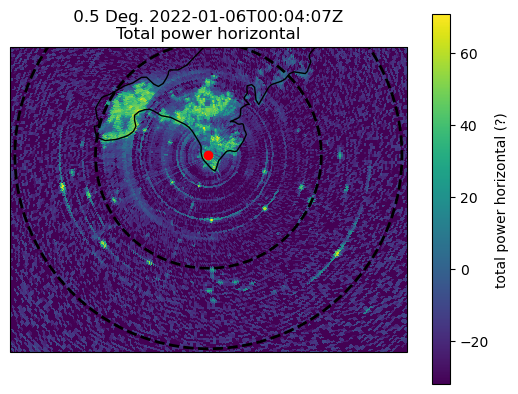

In [17]:
#Plot reading of a fied of one particular graph
radar = radarList[0]
plot_reading_graph(radar, "total_power_horizontal", vmax =None,vmin=None,gatefilter=None,name=None,save = False)

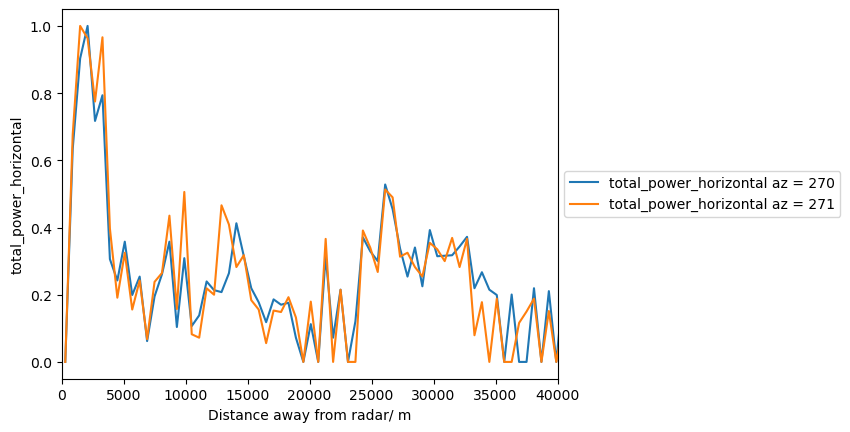

In [18]:
#Plot the azimuths line graph, azs must be a list, even if it is just one element
azs = [270,271]
radar = radarList[0]
azimuth_line(radar, azs, "total_power_horizontal", xlim=40000, name= None, save = False, gatefilter = None)

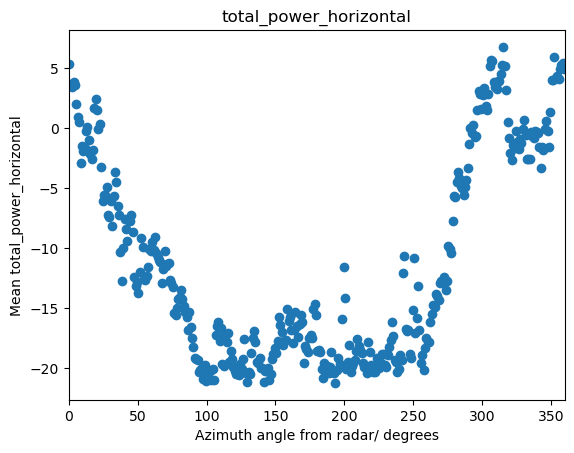

In [19]:
#Plot the mean by azimuth line
radar = radarList[0]
mean_by_azimuth(radar, "total_power_horizontal", mean_range = (0,60), xlim =(0,360), gatefilter = None)

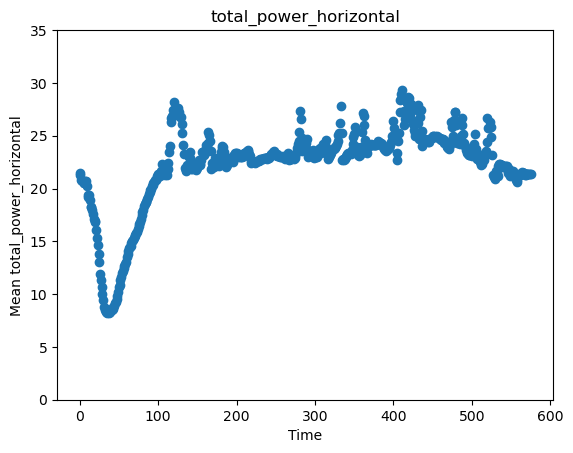

In [20]:
#Plots a graph of the evolution a field along the list of radars defined previously
warnings.filterwarnings('ignore')

average_value_graph(radarList, "total_power_horizontal", range_values = (5,60),azimuth_values = (175,275), xlim = None,ylim = (0,35), gatefilter = None, save = False, name =None, show= False)

In [ ]:
radarList = get_radar_list(selected_data)



In [ ]:
radar_list[0].describe

In [ ]:
for i in range(0,len(radarList),12):
    radar= radarList[i]
    name="figs/20220106-07/lp05/"+ "-".join(radar.time["units"].split(" ")[-1].split(":"))
    plot_all_graph(radar,save=True,name = name+ "-scan")
    plot_all_mean_by_azimuth(radar,mean_range = (5,60), xlim =(90,300),save=True,name = name+ "-meanaz")


In [ ]:
def get_wave_direction(radar):
    
    vel_array = radar.fields["velocity"]["data"][170:275].T
    vel_array = vel_array[10:30].T
    data = [np.mean(row) for row in vel_array]
    wind_values = []
    wind_size = 20
    for i in range(len(data)-wind_size):
        wind_values.append(np.mean(data[i:i+wind_size]))       
    
    #plt.plot(range(170+int(wind_size/2)+3,275-int(wind_size/2)-3),grad)
    plt.plot(range(170,275),data);
    plt.plot(range(170+int(wind_size/2),275-int(wind_size/2)),wind_values);
    plt.show()